# 去他妈的美赛

我获取了一大堆傻逼数据，下面要进行一系列编程。

## 1 数据获取、数据审阅及相关性分析
### 1.1先获取数据

In [34]:
# 导库
import pandas as pd
import matplotlib.pyplot as plt
# 读文件
global_data=pd.read_csv('D:/数模/2021年美国数学建模大赛/dataForF/各国总览_为相关性分析.csv')
global_data

,Nations,QStop100,GDP,Funds_of_Education,FE_over_GDP,Articals,RDE_over_GDP,Patents,AdmissionRate
0,CHN,6.0,14860775.0,594431.0,4.0,528263.0,2.18568,1393815.0,58.7
1,RUS,1.0,1464078.0,54171.0,3.7,81579.0,0.98988,24926.0,80.4
2,IND,0.0,2598583.0,80556.0,3.1,135788.0,0.64998,16289.0,26.9
3,ESP,0.0,1247464.0,52393.0,4.2,54537.0,1.23700,1525.0,89.7
4,GBR,18.0,2638296.0,145106.0,5.5,97681.0,1.72412,12865.0,56.5
5,DEU,4.0,3780553.0,181467.0,4.8,104396.0,3.09415,46417.0,68.3
6,FRA,3.0,2551451.0,137778.0,5.4,66352.0,2.20002,14303.0,65.5
7,ITA,0.0,1848222.0,70232.0,3.8,71240.0,1.39909,8921.0,62.5
8,CAN,3.0,1600264.0,88015.0,5.5,59968.0,1.56625,4349.0,70.3
9,USA,30.0,20807269.0,1040363.0,5.0,422808.0,2.83766,285095.0,85.8


### 1.2数据清洗

In [35]:
# 发现有空数据，先删掉空数据
global_data=global_data.dropna()

# 因为GDP、教育经费这些跟一个国家的经济体量有关，所以将其删掉，取其比例作为参考标准
global_data=global_data.drop(['Funds_of_Education'],axis=1)
global_data=global_data.drop(['GDP'],axis=1)

# 再看看现在的数据
global_data

,Nations,QStop100,FE_over_GDP,Articals,RDE_over_GDP,Patents,AdmissionRate
0,CHN,6.0,4.0,528263.0,2.18568,1393815.0,58.7
1,RUS,1.0,3.7,81579.0,0.98988,24926.0,80.4
2,IND,0.0,3.1,135788.0,0.64998,16289.0,26.9
3,ESP,0.0,4.2,54537.0,1.23700,1525.0,89.7
4,GBR,18.0,5.5,97681.0,1.72412,12865.0,56.5
5,DEU,4.0,4.8,104396.0,3.09415,46417.0,68.3
6,FRA,3.0,5.4,66352.0,2.20002,14303.0,65.5
7,ITA,0.0,3.8,71240.0,1.39909,8921.0,62.5
8,CAN,3.0,5.5,59968.0,1.56625,4349.0,70.3
9,USA,30.0,5.0,422808.0,2.83766,285095.0,85.8


现在数据看起来舒服了，但是指标看起来还是有点多，因次我们进行相关性分析看看能不能删除一些指标
### 1.3 相关性分析

#### 1.3.1 标准化
要进行相关性分析，首先要将数据标准化

In [36]:
# 懒得自己写，所以直接导库
from sklearn.preprocessing import StandardScaler
# 先把国家名字删掉
global_data=global_data.drop(['Nations'],axis=1)
# 标准化
global_data_std=StandardScaler().fit_transform(global_data)
global_data_std

array([[-0.01946616, -0.59134867,  2.54161624,  0.01997198,  3.20510624,
        -0.57241353],
       [-0.60345098, -0.96483204, -0.45167517, -1.04253464, -0.42560276,
         0.69184842],
       [-0.72024795, -1.71179879, -0.08841315, -1.34454668, -0.4485107 ,
        -2.42511076],
       [-0.72024795, -0.34235976, -0.63288736, -0.8229606 , -0.48766931,
         1.23367497],
       [ 1.38209741,  1.27606819, -0.34377344, -0.39013887, -0.45759219,
        -0.70058755],
       [-0.25306009,  0.40460699, -0.29877529,  0.82717669, -0.3686021 ,
        -0.01310871],
       [-0.36985705,  1.15157373, -0.55371341,  0.03271353, -0.45377817,
        -0.17623928],
       [-0.72024795, -0.84033759, -0.52095825, -0.67893844, -0.46805287,
        -0.35102204],
       [-0.36985705,  1.27606819, -0.59649348, -0.53041143, -0.4801792 ,
         0.10341313],
       [ 2.78366098,  0.6535959 ,  1.83494767,  0.5992771 ,  0.26444438,
         1.00645738],
       [-0.25306009,  0.77809036, -0.55355258,  2.

In [37]:
import numpy as np
# 获取特征向量
mean_vec=np.mean(global_data_std,axis=0)
# 构造协方差矩阵
#协方差矩阵
cov_mat=(global_data_std-mean_vec   #对应相减，得出结果仍是149*4 
        ).T.dot((global_data_std-mean_vec))/(global_data_std.shape[0]-1)   #向量内积
print('协方差矩阵:\n',cov_mat)   #实对称阵

协方差矩阵:
 [[ 1.09090909  0.47389055  0.585227    0.27764588  0.15808111  0.20330583]
 [ 0.47389055  1.09090909 -0.09861798  0.40920761 -0.19058639  0.43240382]
 [ 0.585227   -0.09861798  1.09090909  0.1062711   0.9266844  -0.06729999]
 [ 0.27764588  0.40920761  0.1062711   1.09090909  0.19422888  0.51886821]
 [ 0.15808111 -0.19058639  0.9266844   0.19422888  1.09090909 -0.08966796]
 [ 0.20330583  0.43240382 -0.06729999  0.51886821 -0.08966796  1.09090909]]


In [38]:
# 作弊，把对角线全部改成1
for i in range(6):
    cov_mat[i][i]=1.01

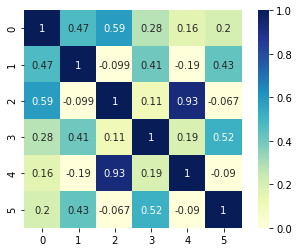

In [39]:
# 绘制协方差矩阵热力图
import seaborn as sns
sns.heatmap(cov_mat, annot=True,vmax=1,vmin=0,xticklabels=True,
                             yticklabels=True,square=True,cmap="YlGnBu")
plt.show()

我们发现，2号指标(论文熟)和4号指标(专利数)之间具有较高的相关系数(0.93)，因此我们认为可以使用2号指标直接代替4号指标。
因此，我们接下来要做的是将4号指标删除，再次绘制相关系数热力图

In [40]:
# 删除专利指标
global_data=global_data.drop(['Patents'],axis=1)
# 重新标准化
global_data_std=StandardScaler().fit_transform(global_data)
global_data_std

array([[-0.01946616, -0.59134867,  2.54161624,  0.01997198, -0.57241353],
       [-0.60345098, -0.96483204, -0.45167517, -1.04253464,  0.69184842],
       [-0.72024795, -1.71179879, -0.08841315, -1.34454668, -2.42511076],
       [-0.72024795, -0.34235976, -0.63288736, -0.8229606 ,  1.23367497],
       [ 1.38209741,  1.27606819, -0.34377344, -0.39013887, -0.70058755],
       [-0.25306009,  0.40460699, -0.29877529,  0.82717669, -0.01310871],
       [-0.36985705,  1.15157373, -0.55371341,  0.03271353, -0.17623928],
       [-0.72024795, -0.84033759, -0.52095825, -0.67893844, -0.35102204],
       [-0.36985705,  1.27606819, -0.59649348, -0.53041143,  0.10341313],
       [ 2.78366098,  0.6535959 ,  1.83494767,  0.5992771 ,  1.00645738],
       [-0.25306009,  0.77809036, -0.55355258,  2.35184437,  1.43758818],
       [-0.13626313, -1.0893265 , -0.33632177,  0.97854701, -0.2345002 ]])

In [41]:
# 重新获取特征向量
mean_vec=np.mean(global_data_std,axis=0)
# 重新构造协方差矩阵
cov_mat=(global_data_std-mean_vec    
        ).T.dot((global_data_std-mean_vec))/(global_data_std.shape[0]-1)   #向量内积
print('协方差矩阵:\n',cov_mat)   #实对称阵

协方差矩阵:
 [[ 1.09090909  0.47389055  0.585227    0.27764588  0.20330583]
 [ 0.47389055  1.09090909 -0.09861798  0.40920761  0.43240382]
 [ 0.585227   -0.09861798  1.09090909  0.1062711  -0.06729999]
 [ 0.27764588  0.40920761  0.1062711   1.09090909  0.51886821]
 [ 0.20330583  0.43240382 -0.06729999  0.51886821  1.09090909]]


In [44]:
# 重新作弊，把对角线全部改成1（滑稽
for i in range(5):
    cov_mat[i][i]=1.01

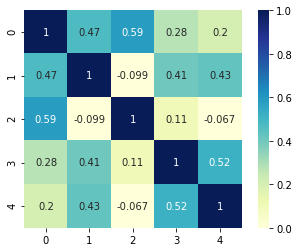

In [45]:
# 重新绘制协方差矩阵热力图
import seaborn as sns
sns.heatmap(cov_mat, annot=True,vmax=1,vmin=0,xticklabels=True,
                             yticklabels=True,square=True,cmap="YlGnBu")
plt.show()

剩下的指标之间的相关系数并没有很高以至于能被另一个指标完全替代。此时，我们认为我们的5个指标能够充分表示一个国家高等教育水平。因此我们对国家高等教育水平健康与否进行评判的时候将采用这五个指标。也即QStop100(QS)、FE_over_GDP(FEGDP)、Articles(ATC)、RDE_over_GDP(RDE/GDP)和AdmissionRate(AR)。

## 2 使用TOPSIS对当下的情况进行评分
完成上一步后，我们需要设计一个模型能够对任意一个国家的高等教育健康状况进行评估

在这里，我们希望模型能够达到的效果是：

1）模型能够很客观地确定某个指标的重要程度

2）模型能够为针对不同国家各个指标的情况为每个国家的高等教育健康状况进行评价

因此，在这里，我们使用熵权法确定每个指标的权值，并使用TOPSIS方法对国家的高等教育健康状况进行评分。

### 2.1 熵权法确定权值

这里省略熵权法的优点（论文里可以写）。它满足了我们对改评价模型的预期效果1）

参考：https://zhuanlan.zhihu.com/p/267259810

In [49]:
# 先看一眼现在的数据
global_data

,QStop100,FE_over_GDP,Articals,RDE_over_GDP,AdmissionRate
0,6.0,4.0,528263.0,2.18568,58.7
1,1.0,3.7,81579.0,0.98988,80.4
2,0.0,3.1,135788.0,0.64998,26.9
3,0.0,4.2,54537.0,1.23700,89.7
4,18.0,5.5,97681.0,1.72412,56.5
5,4.0,4.8,104396.0,3.09415,68.3
6,3.0,5.4,66352.0,2.20002,65.5
7,0.0,3.8,71240.0,1.39909,62.5
8,3.0,5.5,59968.0,1.56625,70.3
9,30.0,5.0,422808.0,2.83766,85.8


In [50]:
# 改个名字输起来方便些
df=global_data

#### 2.1.1 标准化

In [ ]:
idx=['QStop100','FE_over_GDP','Articals','RDE_over_GDP','AdmissionRate']
for i in idx:
    df[i]=df[i].apply(lambda x: (x-df[i].min())/(df[i].max()-df[i].min()))

In [58]:
# 看看现在数据编程什么样
df

,QStop100,FE_over_GDP,Articals,RDE_over_GDP,AdmissionRate
0,0.200000,0.375000,1.000000,0.369149,0.479638
1,0.033333,0.250000,0.057084,0.081705,0.806938
2,0.000000,0.000000,0.171515,0.000000,0.000000
3,0.000000,0.458333,0.000000,0.141107,0.947210
4,0.600000,1.000000,0.091074,0.258200,0.446456
5,0.133333,0.708333,0.105249,0.587525,0.624434
6,0.100000,0.958333,0.024941,0.372596,0.582202
7,0.000000,0.291667,0.035259,0.180070,0.536953
8,0.100000,1.000000,0.011464,0.220251,0.654600
9,1.000000,0.791667,0.777392,0.525871,0.888386


#### 2.1.2.求各个指标在各个方案下的比值

In [59]:
p=[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]
for i in range(0,12):
    for j in range(0,5):
        p[i][j]=df.iloc[i,j]/ (df.iloc[:,j].sum())
p

[[0.08108108108108109,
  0.05454545454545455,
  0.41799217708413294,
  0.08457117178736108,
  0.06366366366366366],
 [0.013513513513513513,
  0.036363636363636376,
  0.023860511039523104,
  0.018718331243422565,
  0.10710710710710712],
 [0.0, 0.0, 0.07169182687938362, 0.0, 0.0],
 [0.0, 0.06666666666666668, 0.0, 0.032327257447819696, 0.1257257257257257],
 [0.24324324324324323,
  0.14545454545454548,
  0.038068112132578394,
  0.05915301065551608,
  0.05925925925925926],
 [0.05405405405405405,
  0.10303030303030303,
  0.043993092963522766,
  0.1346007169027247,
  0.08288288288288288],
 [0.04054054054054054,
  0.13939393939393943,
  0.010424966272167943,
  0.0853608772008082,
  0.07727727727727728],
 [0.0,
  0.04242424242424241,
  0.014737893495050456,
  0.04125357198517292,
  0.07127127127127128],
 [0.04054054054054054,
  0.14545454545454548,
  0.004792043319859847,
  0.05045909199297085,
  0.08688688688688688],
 [0.4054054054054054,
  0.11515151515151516,
  0.32494394871075416,
  0.12047

#### 2.1.4 计算信息熵

In [62]:
# 计算信息熵
entorpy=[0,0,0,0,0]
k=0
for j in range(5):
    for i in range(12):
        if p[i][j]!=0:
            k=k+p[i][j]*np.log(p[i][j])
        entorpy[j]=k

#     entorpy_quotion[j]=entorpy_quotion[j]*(-1*(1/np.log(12)))
for i in range(5):
    entorpy[i]*=((-1)/np.log(12))
for i in range(5):
    entorpy[i]*=(1/np.array(entorpy).sum())
entorpy

[0.05915010506410453,
 0.1447758029506081,
 0.23253404326084592,
 0.409305204107336,
 0.8283260867824983]

#### 2.1.5 计算权重

In [64]:
w=[0.2]*5
for i in range (5):
    w[i]=(1-entorpy[i])/(5-np.array(entorpy).sum())
w

[0.2828850589240015,
 0.2571400057307047,
 0.23075376163921785,
 0.17760402912473358,
 0.05161714458134236]

至此，我们已经获得了五个指标对应的五个权重。接下来，我们可以进行评分算法的编写。（论文中到此处可以附上一个表格，描述每个指标对应的权重，并说明这个权重也符合我们对每个指标的判断）

### 2.2 TOPSIS评分
#### 2.2.1 标准化

In [67]:
# 这里我重新读了一遍文件并进行标准化
global_data=pd.read_csv('D:/数模/2021年美国数学建模大赛/dataForF/各国总览_为相关性分析.csv')
# 发现有空数据，先删掉空数据
global_data=global_data.dropna()
# 因为GDP、教育经费这些跟一个国家的经济体量有关，所以将其删掉，取其比例作为参考标准
global_data=global_data.drop(['Funds_of_Education'],axis=1)
global_data=global_data.drop(['GDP'],axis=1)
# 国家名字删掉
global_data=global_data.drop(['Nations'],axis=1)
# 删除专利指标
global_data=global_data.drop(['Patents'],axis=1)
global_data

,QStop100,FE_over_GDP,Articals,RDE_over_GDP,AdmissionRate
0,6.0,4.0,528263.0,2.18568,58.7
1,1.0,3.7,81579.0,0.98988,80.4
2,0.0,3.1,135788.0,0.64998,26.9
3,0.0,4.2,54537.0,1.23700,89.7
4,18.0,5.5,97681.0,1.72412,56.5
5,4.0,4.8,104396.0,3.09415,68.3
6,3.0,5.4,66352.0,2.20002,65.5
7,0.0,3.8,71240.0,1.39909,62.5
8,3.0,5.5,59968.0,1.56625,70.3
9,30.0,5.0,422808.0,2.83766,85.8


In [68]:
# 换个名字
df=global_data

In [69]:
# 计算平方和
square=[]
for c in range(df.shape[1]):
    s=0
    for r in range(df.shape[0]):
        s=s+df.iloc[r,c]*df.iloc[r,c]
    square.append(s)
square

[1336.0,
 248.04999999999998,
 533576019917.0,
 71.35304198889999,
 59883.409999999996]

In [72]:
# 标准化（去除单位的影响
idx=['QStop100','FE_over_GDP','Articals','RDE_over_GDP','AdmissionRate']
for i in range(len(idx)):
    df[idx[i]]=df[idx[i]].apply(lambda x: x/np.sqrt(square[i]))
df

,QStop100,FE_over_GDP,Articals,RDE_over_GDP,AdmissionRate
0,0.164153,0.253975,0.723189,0.258750,0.239875
1,0.027359,0.234927,0.111681,0.117186,0.328551
2,0.000000,0.196830,0.185893,0.076947,0.109926
3,0.000000,0.266673,0.074661,0.146441,0.366555
4,0.492458,0.349215,0.133725,0.204109,0.230885
5,0.109435,0.304770,0.142918,0.366298,0.279105
6,0.082076,0.342866,0.090836,0.260448,0.267663
7,0.000000,0.241276,0.097527,0.165630,0.255403
8,0.082076,0.349215,0.082096,0.185419,0.287278
9,0.820763,0.317468,0.578822,0.335934,0.350618


#### 加权

In [73]:
for i in range(len(idx)):
    df[idx[i]]=df[idx[i]].apply(lambda x: x*w[i])
df

,QStop100,FE_over_GDP,Articals,RDE_over_GDP,AdmissionRate
0,0.046436,0.065307,0.166879,0.045955,0.012382
1,0.007739,0.060409,0.025771,0.020813,0.016959
2,0.000000,0.050613,0.042896,0.013666,0.005674
3,0.000000,0.068572,0.017228,0.026009,0.018921
4,0.139309,0.089797,0.030857,0.036251,0.011918
5,0.030958,0.078368,0.032979,0.065056,0.014407
6,0.023218,0.088165,0.020961,0.046257,0.013816
7,0.000000,0.062042,0.022505,0.029417,0.013183
8,0.023218,0.089797,0.018944,0.032931,0.014828
9,0.232182,0.081634,0.133565,0.059663,0.018098


#### 获取正负理想解

In [74]:
max_df=df.max()
min_df=df.min()
df['score']=0

#### 计算评分

In [75]:
# 计算分数
for r in range(df.shape[0]):
    f=0
    d_p=0
    d_n=0
    for c in range(df.shape[1]-1):
        d_p+=(df.iloc[r,c]-max_df[c])**2
        d_n+=(df.iloc[r,c]-min_df[c])**2
    d_n=np.sqrt(d_n)
    d_p=np.sqrt(d_p)
    df.iloc[r,5]=d_n/(d_n+d_p)
df

,QStop100,FE_over_GDP,Articals,RDE_over_GDP,AdmissionRate,score
0,0.046436,0.065307,0.166879,0.045955,0.012382,0.451367
1,0.007739,0.060409,0.025771,0.020813,0.016959,0.067547
2,0.000000,0.050613,0.042896,0.013666,0.005674,0.083843
3,0.000000,0.068572,0.017228,0.026009,0.018921,0.081592
4,0.139309,0.089797,0.030857,0.036251,0.011918,0.453826
5,0.030958,0.078368,0.032979,0.065056,0.014407,0.218739
6,0.023218,0.088165,0.020961,0.046257,0.013816,0.175743
7,0.000000,0.062042,0.022505,0.029417,0.013183,0.070403
8,0.023218,0.089797,0.018944,0.032931,0.014828,0.159591
9,0.232182,0.081634,0.133565,0.059663,0.018098,0.831586


评分完成，这里可以做一个表，说明哪个国家多少分。

评分结果：美国第一，英国第二，中国第三

## 3 对各国未来的指标变化进行预测

### 3.1 作图观察变化规律

在进行预测之前，我们需要对各国个指标的变化情况进行可视化，尝试概括其变化规律。由于我们获取了许多国家的数据，全部呈现于图中并不利于我们对图像进行观察，因此在论文中我们呈现了了美国USA，中国CHN以及英国GBR三国的各指标变化情况的可视化图像

#### 3.1.1 QStop100变化情况

In [4]:
# 读数据
QStop=pd.read_csv('D:/数模/2021年美国数学建模大赛/dataForF/QStop100.csv')
QStop

,QStop100,2012,2013,2014,2015,2016,2017,2018,2019
0,中国(大陆),3,3,3,3,4,4,5,6
1,俄罗斯联邦,0,0,0,0,0,0,1,1
2,印度,0,0,0,0,0,0,0,0
3,西班牙,0,0,0,0,0,0,0,0
4,英国,17,18,18,19,18,18,16,18
5,德国,4,3,3,3,4,3,3,4
6,法国,2,2,2,2,2,2,2,3
7,意大利,0,0,0,0,0,0,0,0
8,加拿大,4,3,5,5,3,4,3,3
9,美国,30,31,28,28,30,31,31,30


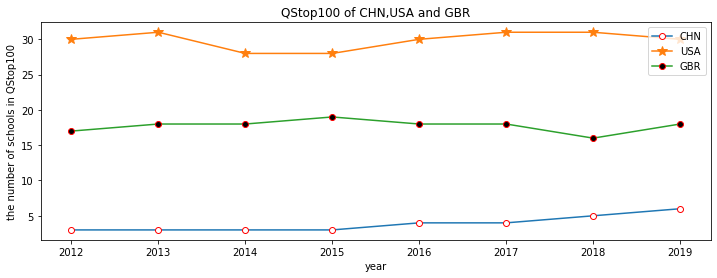

<Figure size 432x288 with 0 Axes>

In [29]:
%matplotlib inline
fig = plt.figure(figsize=(12,4))
plt.plot(np.arange(2012,2020), QStop.iloc[0,1:], label='CHN',marker='o', mec='r', mfc='w')
plt.plot(np.arange(2012,2020), QStop.iloc[9,1:], label='USA', marker='*', ms=10)
plt.plot(np.arange(2012,2020), QStop.iloc[4,1:], label='GBR',marker='o', mec='r',mfc='k')
plt.title('QStop100 of CHN,USA and GBR')
plt.xlabel('year')
plt.ylabel('the number of schools in QStop100')
plt.legend(loc='upper right')#绘制曲线图例，信息来自类型label
plt.show()

#### 3.1.2 FEGDP变化情况

In [2]:
import pandas as pd
# 读数据
FEGDP=pd.read_csv('D:/数模/2021年美国数学建模大赛/dataForF/教育经费GDP占比(已自动还原).csv')
FEGDP=FEGDP.dropna()
FEGDP

,国家 Name,国家 Code,2010,2011,2012,2013,2014,2015,2016,2017
0,China,CHN,3.66000,3.93000,4.28000,4.30000,4.15000,4.26000,4.22,4.14000
1,Russian Federation,RUS,3.98950,3.68990,3.79310,3.76383,4.01388,3.83403,3.76044,4.68991
3,United States,USA,5.77340,5.34210,5.34910,4.93105,4.96174,5.78930,5.7792,5.93450
4,United Kingdom,GBR,5.70324,5.59523,5.57000,5.52980,5.59900,5.55616,5.4267,5.44209
5,"Korea, Rep.",KOR,4.11000,3.78000,3.95000,4.01000,4.35000,4.14000,4.3331,4.44500
6,Italy,ITA,4.33412,4.11568,4.05602,4.14367,4.06128,4.07363,3.81579,4.04494
7,Japan,JPN,3.63950,3.64258,3.69226,3.66538,3.59059,3.42300,3.18618,3.18218
8,Canada,CAN,5.36993,5.27444,5.37660,5.10340,5.12000,4.96700,5,5.00300
9,Spain,ESP,4.85608,4.89692,4.46934,4.35102,4.30338,4.28657,4.22764,4.20774
10,India,IND,3.37769,3.79618,3.86750,3.84467,3.79560,4.00100,4.2345,4.15600


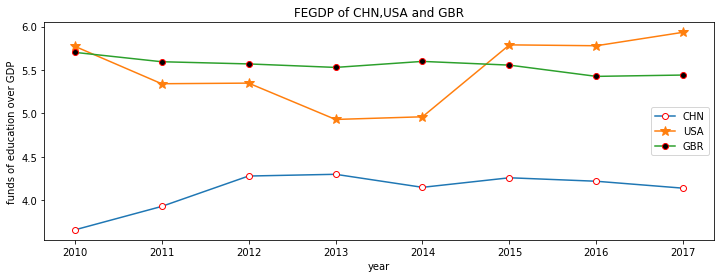

In [23]:
# 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(12,4))
plt.plot(np.arange(2010,2018), FEGDP.iloc[0,2:], label='CHN',marker='o', mec='r', mfc='w')
plt.plot(np.arange(2010,2018), FEGDP.iloc[2,2:], label='USA', marker='*', ms=10)
plt.plot(np.arange(2010,2018), FEGDP.iloc[3,2:], label='GBR',marker='o', mec='r',mfc='k')
plt.title('FEGDP of CHN,USA and GBR')
plt.xlabel('year')
plt.ylabel('funds of education over GDP')
plt.legend(loc='right')#绘制曲线图例，信息来自类型label
plt.show()

#### 3.1.3 Articals变化情况

In [12]:
# 读数据
article=pd.read_csv('D:/数模/2021年美国数学建模大赛/dataForF/论文.csv')
article=article.dropna()
article

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,中国,312517,326771,329015,359274,390396,407975,438349,473439,528263
1,俄罗斯联邦,33827,35924,36000,38412,44366,52176,62662,70825,81579
2,印度,62437,74143,80493,86348,96426,101813,112167,121631,135788
3,法国,68746,70612,72629,73632,73299,71926,71028,70101,66352
4,英国,93792,95820,98145,99228,99385,99616,99366,99129,97681
5,西班牙,48989,52256,54628,54910,56560,55147,55514,55432,54537
6,德国,97252,100769,105433,105731,108474,106453,108296,107803,104396
7,意大利,58651,60453,64352,67592,69720,70519,70534,71485,71240
8,加拿大,56295,57595,59608,59902,60775,60533,60045,60215,59968
9,美国,408817,423959,427997,429570,433192,429989,427265,432216,422808


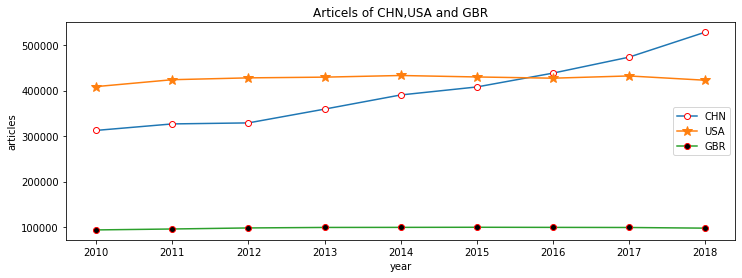

In [24]:
# 作图
%matplotlib inline
fig = plt.figure(figsize=(12,4))
plt.plot(np.arange(2010,2019), article.iloc[0,1:], label='CHN',marker='o', mec='r', mfc='w')
plt.plot(np.arange(2010,2019), article.iloc[9,1:], label='USA', marker='*', ms=10)
plt.plot(np.arange(2010,2019), article.iloc[4,1:], label='GBR',marker='o', mec='r',mfc='k')
plt.title('Articels of CHN,USA and GBR')
plt.xlabel('year')
plt.ylabel('articles')
plt.legend(loc='right')#绘制曲线图例，信息来自类型label
plt.show()

#### 3.1.4 Research Funding_over_GDP变化情况

In [15]:
# 读数据
RDEGDP=pd.read_csv('D:/数模/2021年美国数学建模大赛/dataForF/科研经费.csv')
# article=article.dropna()
RDEGDP

,Country Name,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,中国,1.71372,1.78034,1.91214,1.99786,2.02963,2.06560,2.11831,2.14512,2.18568
1,印度,0.78849,0.75502,0.74399,0.70642,0.70159,0.69310,0.67111,0.66584,0.64998
2,大韩民国,3.46594,3.74361,4.02554,4.14853,4.28874,4.21702,4.22744,4.55324,4.81009
3,加拿大,1.82958,1.79132,1.77660,1.70964,1.71824,1.69718,1.73019,1.67165,1.56625
4,美国,2.73540,2.76525,2.68166,2.70972,2.71924,2.71742,2.76145,2.81741,2.83766
5,西班牙,1.34961,1.32508,1.28788,1.26859,1.23535,1.21832,1.18526,1.20580,1.23700
6,法国,2.17857,2.19161,2.22707,2.23703,2.27592,2.26703,2.22238,2.20557,2.20002
7,日本,3.13708,3.24477,3.20908,3.31496,3.40022,3.28165,3.15522,3.21254,3.26451
8,意大利,1.22311,1.20984,1.27087,1.30768,1.34301,1.34115,1.37124,1.37744,1.39909
9,英国,1.66063,1.66488,1.59382,1.63938,1.65915,1.66818,1.68211,1.69829,1.72412


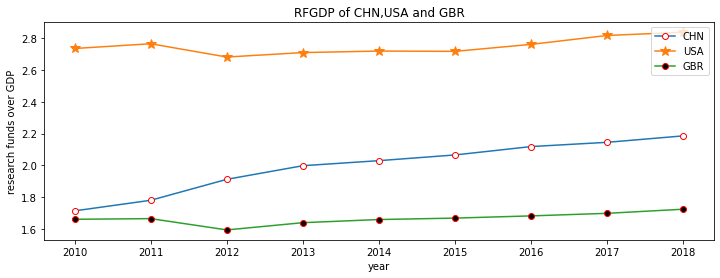

In [26]:
# 作图
%matplotlib inline
fig = plt.figure(figsize=(12,4))
plt.plot(np.arange(2010,2019), RDEGDP.iloc[0,1:], label='CHN',marker='o', mec='r', mfc='w')
plt.plot(np.arange(2010,2019), RDEGDP.iloc[4,1:], label='USA', marker='*', ms=10)
plt.plot(np.arange(2010,2019), RDEGDP.iloc[9,1:], label='GBR',marker='o', mec='r',mfc='k')
plt.title('RFGDP of CHN,USA and GBR')
plt.xlabel('year')
plt.ylabel('research funds over GDP')
plt.legend(loc='upper right')#绘制曲线图例，信息来自类型label
plt.show()

#### 3.1.4 Admission Rate变化情况

In [34]:
# 读数据
AR=pd.read_csv('D:/数模/2021年美国数学建模大赛/dataForF/适龄人口入学率.csv')
AR=AR.dropna()
AR

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018
0,中国,25.647850,28.725670,32.433670,42.430729,46.040428,48.019020,49.073261,50.604439
1,俄罗斯联邦,76.184891,75.907089,77.850319,78.463097,79.938133,80.632622,81.909309,84.584251
2,印度,22.764650,24.267981,23.794830,25.432131,26.768990,26.829220,27.442129,28.060551
3,法国,55.625729,57.909012,59.848759,61.510479,62.785931,64.727676,65.802231,67.624657
4,英国,59.145931,59.402119,57.038761,56.564499,56.458488,58.425621,59.995571,61.382889
5,意大利,65.563118,64.133553,62.296162,61.702751,60.939461,60.937328,61.932999,64.291618
6,德国,59.672000,60.112000,61.386841,65.503906,67.746872,69.580589,70.246651,70.342644
7,西班牙,80.037971,82.270332,83.725639,85.446274,85.611778,86.516083,88.853012,91.112572
8,美国,93.906578,93.175491,88.726418,88.626869,88.889412,88.835052,88.167389,88.299179
9,加拿大,63.467319,63.980770,65.332298,65.612907,64.786957,66.439178,68.922508,70.113022


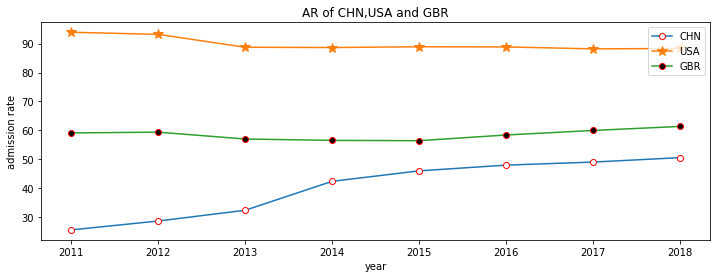

In [36]:
# 作图
%matplotlib inline
fig = plt.figure(figsize=(12,4))
plt.plot(np.arange(2011,2019), AR.iloc[0,1:], label='CHN',marker='o', mec='r', mfc='w')
plt.plot(np.arange(2011,2019), AR.iloc[8,1:], label='USA', marker='*', ms=10)
plt.plot(np.arange(2011,2019), AR.iloc[4,1:], label='GBR',marker='o', mec='r',mfc='k')
plt.title('AR of CHN,USA and GBR')
plt.xlabel('year')
plt.ylabel('admission rate')
plt.legend(loc='upper right')#绘制曲线图例，信息来自类型label
plt.show()

### 3.2 构建GM(1,1)模型预测数据变化

由3.1中绘制的可视化图像可以发现，各国各项指标的变化程度呈现平缓上升或基本稳定的趋势，因此我们决定选用GM(1,1)模型来进行预测